<h2> Análise de Dados Brasileirão 2023 </h2>

**Nessa análise em python poderemos encontrar informações e curiosidades sobre o brasileirão 2023.**

Você verá:

* Times que mais venceram;

* Times que mais perderam;

* Times com melhores eficiências de ataque e piores;

* Times mais tempo na liderança e mais tempo na lanterna;

* Jogadores com mais assistências e gols.




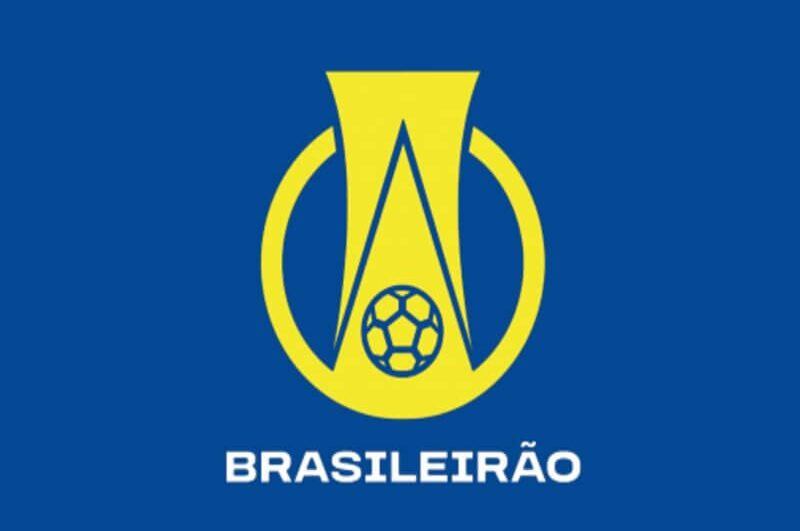


In [9]:
def grafico_barras(tabela, x, y):
  ax = tabela.plot.bar(x=x, y=y)

  # Adicionando rótulos
  for i in ax.patches:
      plt.text(i.get_x() + i.get_width() / 2., i.get_height(), str(round(i.get_height(), 2)), ha='center', va='bottom')

  plt.show()

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL da página da Wikipedia com as tabela do brasileirão 2023
url = "https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2023_-_S%C3%A9rie_A"

# Fazendo a requisição para a URL
response = requests.get(url)

# Criando o objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando a tabela no HTML com a classe desejada
table = soup.find('table', {'class': 'wikitable sortable'})

# Aqui eu pego as infomações em html da 1º tabela
tabela_wiki = pd.read_html(str(table))[0]
tabela_wiki.head(5)

,Equipe,Cidade,Estado,Em 2022,Estádio (mando),Capacidade[10],Títulos
0,América Mineiro,Belo Horizonte,MG,10º,Independência,23 018,0 (não possui)
1,Athletico Paranaense,Curitiba,PR,6º,Ligga Arena,42 370,1 (2001)
2,Atlético Mineiro,Belo Horizonte,MG,7º,Arena MRV[nota 1],44 892[12],"3 (1937,[13] 1971 e 2021)"
3,Bahia,Salvador,BA,3º (Série B),Itaipava Arena Fonte Nova,50 025,2 (1959 e 1988)
4,Botafogo,Rio de Janeiro,RJ,11º,Nilton Santos,44 661,2 (1968[nota 2] e 1995)


<h3> Analisando a quantidade de participantes de clubes por estado </h3>

In [ ]:
# Realizando o value_counts para retornar os estados e suas frequências
tabela_wiki[["Estado"]].value_counts()

Estado
SP        5
RJ        4
MG        3
PR        2
RS        2
BA        1
CE        1
GO        1
MT        1
dtype: int64

In [ ]:
# Podemos chegar a mesma conclusão com o groupby e utilizando a função count()
part_estados = tabela_wiki.groupby("Estado")["Equipe"].count()
part_estados

Estado
BA    1
CE    1
GO    1
MG    3
MT    1
PR    2
RJ    4
RS    2
SP    5
Name: Equipe, dtype: int64

<Axes: xlabel='Estado'>

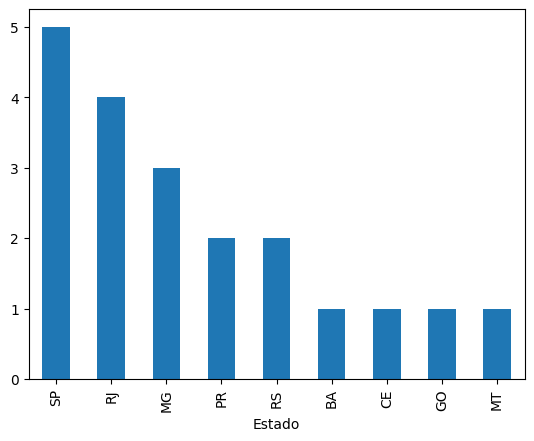

In [ ]:
# Criando o gráfico com as participações por estado
grafico_estados = part_estados.sort_values(ascending=False)
grafico_estados.plot(kind="bar")

In [ ]:
Estados = tabela_wiki[["Estado","Equipe"]]

In [ ]:
# Agora podemos ver as equipes por estados
Equipe_estados = Estados.groupby(["Estado","Equipe"])
Equipe_estados.first()

Empty DataFrame
Columns: []
Index: [(BA, Bahia), (CE, Fortaleza), (GO, Goiás), (MG, América Mineiro), (MG, Atlético Mineiro), (MG, Cruzeiro), (MT, Cuiabá), (PR, Athletico Paranaense), (PR, Coritiba), (RJ, Botafogo), (RJ, Flamengo), (RJ, Fluminense), (RJ, Vasco da Gama), (RS, Grêmio), (RS, Internacional), (SP, Corinthians), (SP, Palmeiras), (SP, Red Bull Bragantino), (SP, Santos), (SP, São Paulo)]

<h3> Por essa análise rápido podemos ver que o estados de SP e RJ tem o maior números de representantes. </h3>

 <h3> Agora vamos fazer a análise principal da tabela de classificação

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

page = requests.get('https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2023_-_S%C3%A9rie_A').text
soup = BeautifulSoup(page, 'html.parser')
# Aqui tive que colocar uma classe diferente para realizar a raspagem
table = soup.find_all('table', class_='wikitable')

df = pd.read_html(str(table))[3]
tabela_participações = pd.DataFrame(df)
tabela_participações.head(10)

,Pos,Equipevde,Pts,J,V,E,D,GP,GC,SG,Classificação ou descenso
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31,Fase de grupos da Copa Libertadores de 2024
1,2,Grêmio,68,38,21,5,12,63,56,+7,Fase de grupos da Copa Libertadores de 2024
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20,Fase de grupos da Copa Libertadores de 2024
3,4,Flamengo,66,38,19,9,10,56,42,+14,Fase de grupos da Copa Libertadores de 2024
4,5,Botafogo,64,38,18,10,10,58,37,+21,Segunda fase da Copa Libertadores de 2024
5,6,Red Bull Bragantino,62,38,17,11,10,49,35,+14,Segunda fase da Copa Libertadores de 2024
6,7,Fluminense,56,38,16,8,14,51,47,+4,Fase de grupos da Copa Libertadores de 2024[a]
7,8,Athletico Paranaense,56,38,14,14,10,51,43,+8,Fase de grupos da Copa Sul-Americana de 2024
8,9,Internacional,55,38,15,10,13,46,45,+1,Fase de grupos da Copa Sul-Americana de 2024
9,10,Fortaleza,54,38,15,9,14,45,44,+1,Fase de grupos da Copa Sul-Americana de 2024


<h3> Primeiro passo é modificar o nome da coluna Equipevde para Clubes para facilitar a análise. Outro ponto importante é deletar a coluna Classificação ou descenso que não será importante aqui </h3>

In [11]:
tabela_participações.rename(columns={'Equipevde':'Clubes'}, inplace=True)
del tabela_participações['Classificação ou descenso']
tabela_participações.head(10)

,Pos,Clubes,Pts,J,V,E,D,GP,GC,SG
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31
1,2,Grêmio,68,38,21,5,12,63,56,+7
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20
3,4,Flamengo,66,38,19,9,10,56,42,+14
4,5,Botafogo,64,38,18,10,10,58,37,+21
5,6,Red Bull Bragantino,62,38,17,11,10,49,35,+14
6,7,Fluminense,56,38,16,8,14,51,47,+4
7,8,Athletico Paranaense,56,38,14,14,10,51,43,+8
8,9,Internacional,55,38,15,10,13,46,45,+1
9,10,Fortaleza,54,38,15,9,14,45,44,+1


**Vamos pegar só as informações que nos interessa, por exemplo: Maiores vencedores. Assim poderemos saber os times com maior número de vitórias**

In [13]:
# Pegando as colunas Clubes e V para analisar os times que mais vencerão
Maiores_vencedores = tabela_participações[["Clubes","V"]].sort_values(by="V",ascending=False).head(5)
Maiores_vencedores

,Clubes,V
1,Grêmio,21
0,Palmeiras (C),20
2,Atlético Mineiro,19
3,Flamengo,19
4,Botafogo,18


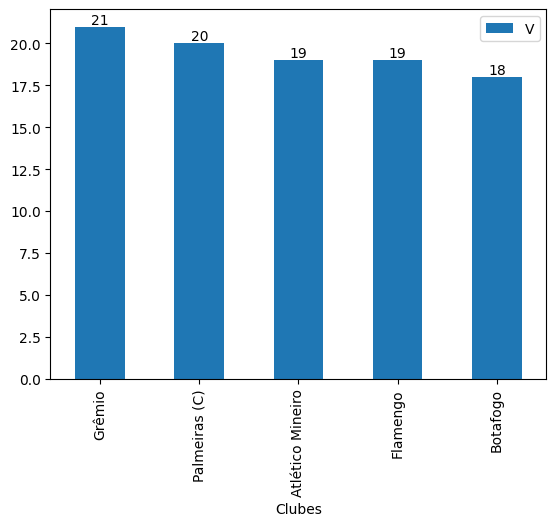

In [15]:
# Criando o gráfico
# Maiores_vencedores.plot.bar(x='Clubes', y='V')
grafico_barras(Maiores_vencedores,'Clubes','V')

**Para encontrarmos os times que menos venceram podemos utilizar o sort_values() sem utilizar o ascending=False**

In [17]:
# Pegando os times com menos vitórias
Menos_vencedores = tabela_participações[["Clubes","V"]].sort_values(by="V").head(5)
Menos_vencedores

,Clubes,V
19,América Mineiro,5
18,Coritiba,8
17,Goiás,9
16,Santos,11
13,Cruzeiro,11


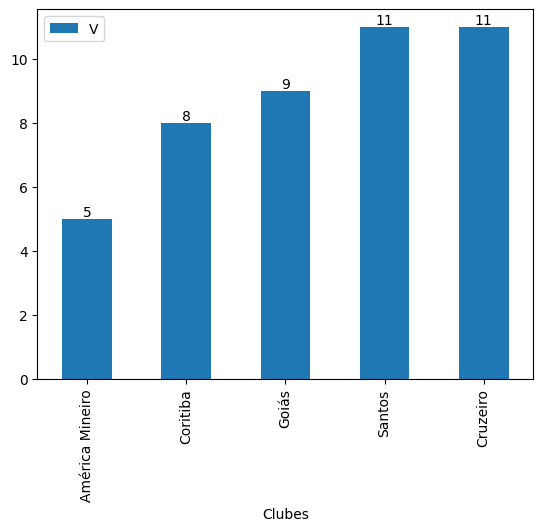

In [19]:
# Gráfico dos times que menos venceram
grafico_barras(Menos_vencedores,'Clubes','V')

**O pensamento é o mesmo para encontramos que tem mais derrotas e menos derrotas**

In [ ]:
# Times com menos derrotas
Menos_derrotas = tabela_participações[["Clubes","D"]].sort_values(by="D").head(5)
Menos_derrotas

,Clubes,D
0,Palmeiras (C),8
2,Atlético Mineiro,10
3,Flamengo,10
4,Botafogo,10
5,Red Bull Bragantino,10


In [ ]:
# Times com mais derrotas
Mais_derrotas = tabela_participações[["Clubes","D"]].sort_values(by="D",ascending=False).head(5)
Mais_derrotas

,Clubes,D
19,América Mineiro,24
18,Coritiba,24
17,Goiás,18
15,Bahia,18
16,Santos,17


<h3> Agora vamos criar novas colunas em nossa tabela para conhecermos informações importantes como: </h3>

* Aproveitamento das equipes
* Percentual de vitórias e derrotas

**<h3>Assim poderemos ver os clubes com os *melhores aproveitamentos e percentual de vitórias e derrotas*.</h3>**

In [ ]:
tabela_participações

,Pos,Clubes,Pts,J,V,E,D,GP,GC,SG
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31
1,2,Grêmio,68,38,21,5,12,63,56,+7
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20
3,4,Flamengo,66,38,19,9,10,56,42,+14
4,5,Botafogo,64,38,18,10,10,58,37,+21
5,6,Red Bull Bragantino,62,38,17,11,10,49,35,+14
6,7,Fluminense,56,38,16,8,14,51,47,+4
7,8,Athletico Paranaense,56,38,14,14,10,51,43,+8
8,9,Internacional,55,38,15,10,13,46,45,+1
9,10,Fortaleza,54,38,15,9,14,45,44,+1


<h3> Para calcular o aproveitamento vamos utilizar a seguinte relação: Pontos/(Jogos*3). Assim podemos calcular o quanto o time pontuo considerando os pontos totais possiveis, que são 38*3 = 114. </h3>

<h3> Já o percentual de vitórias e derrotas será: Vitórias/Jogos e Derrotas/Jogos. </h3>

In [ ]:
# Calculando o aproveitamento de cada equipe
tabela_participações["Apt%"] = round(tabela_participações["Pts"] / (tabela_participações["J"] * 3),2)
tabela_participações["V%"] = round(tabela_participações["V"] / (tabela_participações["J"]),2)
tabela_participações["D%"] = round(tabela_participações["D"] / (tabela_participações["J"]),2)

# Times com os melhores aproveitamentos e percentuais
tabela_participações[["Clubes","Apt%","V%","D%"]].head(5)

,Clubes,Apt%,V%,D%
0,Palmeiras (C),0.61,0.53,0.21
1,Grêmio,0.60,0.55,0.32
2,Atlético Mineiro,0.58,0.50,0.26
3,Flamengo,0.58,0.50,0.26
4,Botafogo,0.56,0.47,0.26


In [ ]:
# Times com os os piores aproveitamentos e percentuais
tabela_participações[["Clubes","Apt%","V%","D%"]].tail(5)

,Clubes,Apt%,V%,D%
15,Bahia,0.39,0.32,0.47
16,Santos,0.38,0.29,0.45
17,Goiás,0.33,0.24,0.47
18,Coritiba,0.26,0.21,0.63
19,América Mineiro,0.21,0.13,0.63


<h3> Agora vamos calcular algumas médias interessantes como: </h3>

* Média de gols pró por equipe => GP/Jogos

* Média de gols contra por equipe => GC/Jogos

In [ ]:
# Criando um novo dataframe para calcular as médias de GP e GC dos clubes
tabela_Medias = tabela_participações[["Clubes"]]
tabela_Medias["Media-GP"] = round(tabela_participações["GP"]/tabela_participações["J"],2)
tabela_Medias["Media-GC"] = round(tabela_participações["GC"]/tabela_participações["J"],2)
tabela_Medias.head(10)

<ipython-input-18-acbfba05d24d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias["Media-GP"] = round(tabela_participações["GP"]/tabela_participações["J"],2)
<ipython-input-18-acbfba05d24d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias["Media-GC"] = round(tabela_participações["GC"]/tabela_participações["J"],2)


,Clubes,Media-GP,Media-GC
0,Palmeiras (C),1.68,0.87
1,Grêmio,1.66,1.47
2,Atlético Mineiro,1.37,0.84
3,Flamengo,1.47,1.11
4,Botafogo,1.53,0.97
5,Red Bull Bragantino,1.29,0.92
6,Fluminense,1.34,1.24
7,Athletico Paranaense,1.34,1.13
8,Internacional,1.21,1.18
9,Fortaleza,1.18,1.16


<h2>Análise de Desempenho Relativo: Vamos comparar o desempenho de um time em relação à média da liga. Por exemplo, quão acima ou abaixo da média é o número de gols marcados por um time?</h2>

**<h3> Agora podemos calcular a média de gols do campeonato e comparar com a média dos clubes. Assim poderemos ver quais clubes possuem as melhores médias em relação do campeonato.</h3>**

In [ ]:
Total_GP_Bra = tabela_participações["GP"].sum()
Total_GP_Bra

946

In [ ]:
jogos = 38

In [ ]:
Jogos_Rodada = jogos*((tabela_participações["Clubes"].count())/2)
Jogos_Rodada

380.0

In [ ]:
Media_GP_Camp = round(Total_GP_Bra/Jogos_Rodada,2)
Media_GP_Camp

2.49

**<h3> Agora podemos calcular a media_relativa que são a média de gols de cada time em relação a media de gols do brasileirão:</h3>**

In [ ]:
tabela_Medias['Media_Relativa'] = round(tabela_Medias['Media-GP'] / Media_GP_Camp,2)
tabela_Medias.head(10)

<ipython-input-23-5f83b63b73c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias['Media_Relativa'] = round(tabela_Medias['Media-GP'] / Media_GP_Camp,2)


,Clubes,Media-GP,Media-GC,Media_Relativa
0,Palmeiras (C),1.68,0.87,0.67
1,Grêmio,1.66,1.47,0.67
2,Atlético Mineiro,1.37,0.84,0.55
3,Flamengo,1.47,1.11,0.59
4,Botafogo,1.53,0.97,0.61
5,Red Bull Bragantino,1.29,0.92,0.52
6,Fluminense,1.34,1.24,0.54
7,Athletico Paranaense,1.34,1.13,0.54
8,Internacional,1.21,1.18,0.49
9,Fortaleza,1.18,1.16,0.47


**<h3>Com essa informações podemos criar uma função para analisar a eficiência de cada time tendo a media de gols do campeonato como referência. *Quanto mais próximo de 1, melhor é a eficiencia do ataque*.</h3>**

In [ ]:
# Criando a função para analisar a eficiencia
def Eficiencia_Ataque(x):
  if x == 1:
    return "Ataque Muito Eficente"
  elif 0.50 < x < 1:
    return "Boa Eficiencia"
  elif 0.40 < x <= 0.50:
    return "Pouco Eficiente"
  else:
    return "Inefiente"

tabela_Medias.loc[:, "Eficiência"] = tabela_Medias['Media_Relativa'].apply(Eficiencia_Ataque)
tabela_Medias


<ipython-input-164-ba608f1f722d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias.loc[:, "Eficiência"] = tabela_Medias['Media_Relativa'].apply(Eficiencia_Ataque)


,Clubes,Media-GP,Media-GC,Media_Relativa,Eficiência
0,Palmeiras (C),1.68,0.87,0.67,Boa Eficiencia
1,Grêmio,1.66,1.47,0.67,Boa Eficiencia
2,Atlético Mineiro,1.37,0.84,0.55,Boa Eficiencia
3,Flamengo,1.47,1.11,0.59,Boa Eficiencia
4,Botafogo,1.53,0.97,0.61,Boa Eficiencia
5,Red Bull Bragantino,1.29,0.92,0.52,Boa Eficiencia
6,Fluminense,1.34,1.24,0.54,Boa Eficiencia
7,Athletico Paranaense,1.34,1.13,0.54,Boa Eficiencia
8,Internacional,1.21,1.18,0.49,Pouco Eficiente
9,Fortaleza,1.18,1.16,0.47,Pouco Eficiente


In [ ]:
pip install adjustText

<h3> Analises de Tendências </h3>

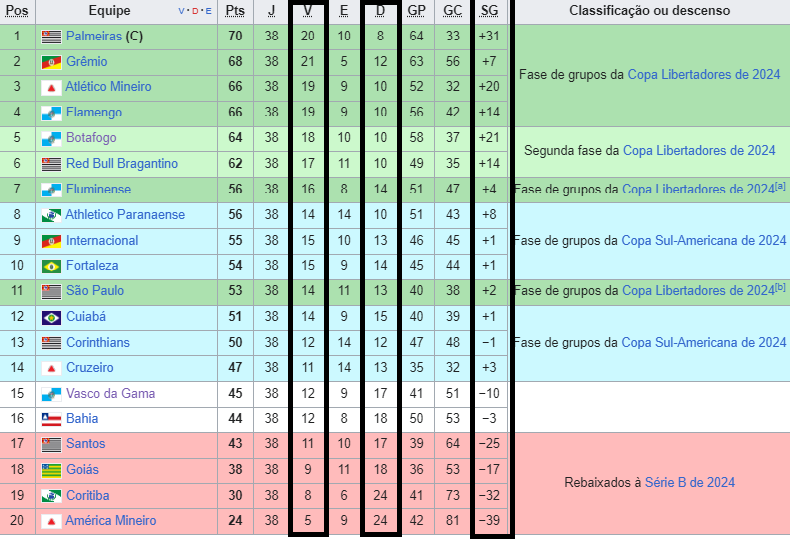

Separei algumas estatistica para analisarmos algumas tendências, podemos perceber que os times com **bons saldo de gols tendem a ficar na parte de cima na tabela**.

Outro ponto importante é avaliar a quantidade de GP e GC com o número de vitórias e derrotas. Geralmente times que **sofrem muito gols têm mais derrotas**.

Vamos analisar isso com um gráfico de correlação onde poderemos ver a correlação entre 2 grandezes. Quanto **mais próximo de 1**, mais correlacionados são as grandezas.

---



--- **Gráfico de correlação entre Gols Pró e Vitórias**

---



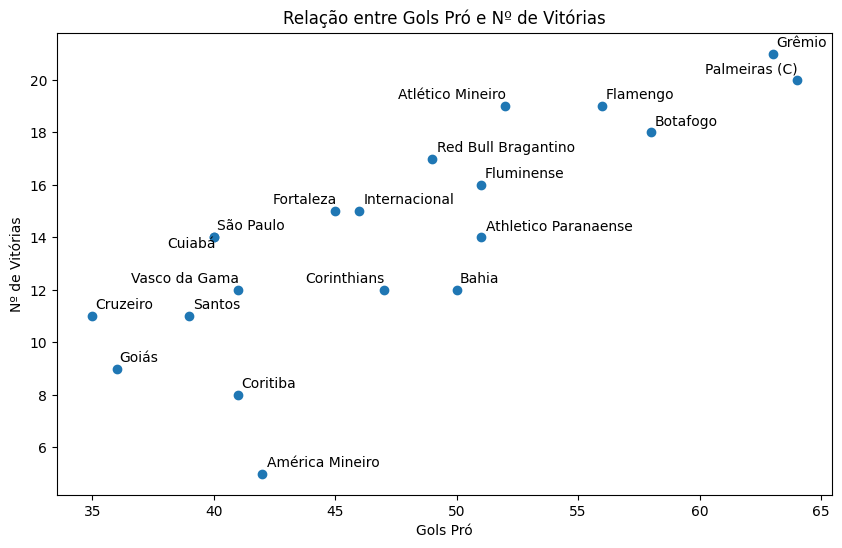

A correlação entre o GP e a V é 0.8019615973474592


In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(10, 6))
plt.scatter(tabela_participações['GP'], tabela_participações['V'])

texts = []
# Adicionando rótulos
for i in range(len(tabela_participações)):
    texts.append(plt.text(tabela_participações['GP'].iloc[i] + 0.1, tabela_participações['V'].iloc[i] + 0.1, tabela_participações['Clubes'].iloc[i]))

# Ajustando automaticamente a posição dos rótulos de texto
adjust_text(texts)

plt.xlabel('Gols Pró')
plt.ylabel('Nº de Vitórias')
plt.title('Relação entre Gols Pró e Nº de Vitórias')
plt.show()

# Calculando a correlação entre 'Desempenho' (ou seja, saldo de gols) e 'Posição'
correlacao = tabela_participações['GP'].corr(tabela_participações['V'])

print(f'A correlação entre o GP e a V é {correlacao}')

**<h3>Parece que há uma correlação positiva entre essas duas variáveis, o que faz sentido intuitivamente - times que fazem mais gols tendem a ganhar mais jogos e estar na parte de cima na tabela.Isso também é observado pela correlação de 0.80, quando mais próximo de 1 mais correlacionadas são as variáveis.**

--- **<h3>Gráfico de correlação entre Gols Contra e Derrotas</h3>**

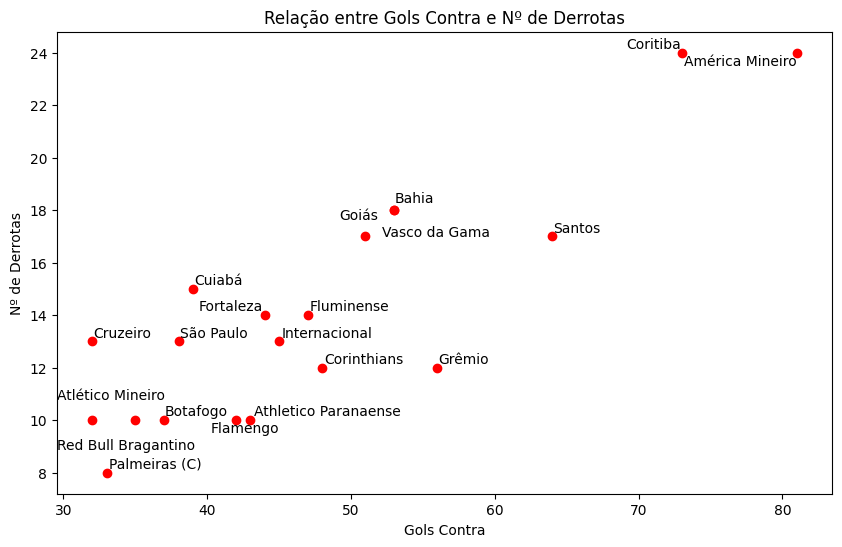

A correlação entre o Gols Contra e a Derrota é 0.8642793072510301


In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(10, 6))
plt.scatter(tabela_participações['GC'], tabela_participações['D'], color="Red")

texts = []
# Adicionando rótulos
for i in range(len(tabela_participações)):
    texts.append(plt.text(tabela_participações['GC'].iloc[i], tabela_participações['D'].iloc[i], tabela_participações['Clubes'].iloc[i]))

# Ajustando automaticamente a posição dos rótulos de texto
adjust_text(texts)

plt.xlabel('Gols Contra')
plt.ylabel('Nº de Derrotas')
plt.title('Relação entre Gols Contra e Nº de Derrotas')
plt.show()

# Calculando a correlação entre 'Desempenho' (ou seja, saldo de gols) e 'Posição'
correlacao = tabela_participações['GC'].corr(tabela_participações['D'])

print(f'A correlação entre o Gols Contra e a Derrota é {correlacao}')

**<h3>Novemente podemos uma correlação entre gols contra levados pelas equipes e o total de derrotas, desta vez sendo uma correlação maior que Gols Pró e Vitórias. A correlação entre as grandezas está em 0.86, mas próximo de 1. Isso pode demostrar que os times que levam mais gols tendem a perder mais e ter mais risco de rebaixamento.</h3>**

**<h3> Melhores e Piores times</h3>**

In [ ]:
# Defina o número de times que você quer selecionar
n = 1

# Melhores ataques (maior número de gols pró)
melhores_ataques = tabela_participações.nlargest(n, 'GP')

# Piores defesas (maior número de gols contra)
piores_defesas = tabela_participações.nlargest(n, 'GC')

maior_vencedor = tabela_participações.nlargest(n, 'V')

maior_perdedor = tabela_participações.nlargest(n,"D")

# Concatene os dois dataframes
result = pd.concat([melhores_ataques, piores_defesas,maior_vencedor,maior_perdedor])
result


,Pos,Clubes,Pts,J,V,E,D,GP,GC,SG,Apt%,V%,D%
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31,0.61,0.53,0.21
19,20,América Mineiro,24,38,5,9,24,42,81,−39,0.21,0.13,0.63
1,2,Grêmio,68,38,21,5,12,63,56,+7,0.60,0.55,0.32
18,19,Coritiba,30,38,8,6,24,41,73,−32,0.26,0.21,0.63



 **<h3>Quem são os fez mais gols e deu mais assistencias ?</h3>**

In [ ]:
df = pd.read_html(str(table))[6]
tabela_artilheiros = pd.DataFrame(df)
tabela_artilheiros

,Pos.,Jogador,Equipe,Gols[28]
0,1,Paulinho,Atlético Mineiro,20
1,2,Luis Suárez,Grêmio,17
2,2,Tiquinho Soares,Botafogo,17
3,4,Hulk,Atlético Mineiro,15
4,5,Marcos Leonardo,Santos,13
5,5,Pedro,Flamengo,13
6,7,Deyverson,Cuiabá,12
7,7,Robson,Coritiba,12
8,7,Vitor Roque,Athletico Paranaense,12


In [ ]:
# Mudando o nome da coluna
tabela_artilheiros.rename(columns={'Gols[28]':'Gols'}, inplace=True)
tabela_artilheiros

,Pos.,Jogador,Equipe,Gols
0,1,Paulinho,Atlético Mineiro,20
1,2,Luis Suárez,Grêmio,17
2,2,Tiquinho Soares,Botafogo,17
3,4,Hulk,Atlético Mineiro,15
4,5,Marcos Leonardo,Santos,13
5,5,Pedro,Flamengo,13
6,7,Deyverson,Cuiabá,12
7,7,Robson,Coritiba,12
8,7,Vitor Roque,Athletico Paranaense,12


In [ ]:
# Ordenando os gols de forma descrescente
artilheiro = tabela_artilheiros[["Jogador","Gols"]].sort_values(by="Gols",ascending=False)
artilheiro

,Jogador,Gols
0,Paulinho,20
1,Luis Suárez,17
2,Tiquinho Soares,17
3,Hulk,15
4,Marcos Leonardo,13
5,Pedro,13
6,Deyverson,12
7,Robson,12
8,Vitor Roque,12


<Axes: xlabel='Jogador'>

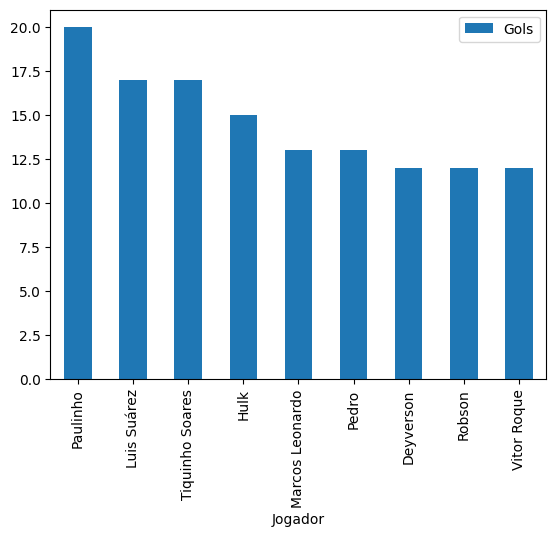

In [ ]:
# Gráficos de maiores artilheiros
artilheiro.plot.bar(x='Jogador', y='Gols')

**<h3>Quem deu mais assistências ?</h3>**

In [ ]:
df = pd.read_html(str(table))[7]
tabela_assistencia = pd.DataFrame(df)
tabela_assistencia

,Pos.,Jogador,Equipe,Asst.[29]
0,1,Hulk,Atlético Mineiro,11
1,1,Luis Suárez,Grêmio,11
2,3,Cristian Pavón,Atlético Mineiro,8
3,3,Gerson,Flamengo,8
4,5,Cauly,Bahia,7
5,5,Jhon Arias,Fluminense,7
6,5,PH Ganso,Fluminense,7
7,5,Raphael Veiga,Palmeiras,7


In [ ]:
tabela_assistencia.rename(columns={'Asst.[29]':'Passes'}, inplace=True)
tabela_assistencia

,Pos.,Jogador,Equipe,Passes
0,1,Hulk,Atlético Mineiro,11
1,1,Luis Suárez,Grêmio,11
2,3,Cristian Pavón,Atlético Mineiro,8
3,3,Gerson,Flamengo,8
4,5,Cauly,Bahia,7
5,5,Jhon Arias,Fluminense,7
6,5,PH Ganso,Fluminense,7
7,5,Raphael Veiga,Palmeiras,7


In [ ]:
passes = tabela_assistencia[["Jogador","Passes"]].sort_values(by="Passes",ascending=False)
passes

,Jogador,Passes
0,Hulk,11
1,Luis Suárez,11
2,Cristian Pavón,8
3,Gerson,8
4,Cauly,7
5,Jhon Arias,7
6,PH Ganso,7
7,Raphael Veiga,7


<Axes: xlabel='Jogador'>

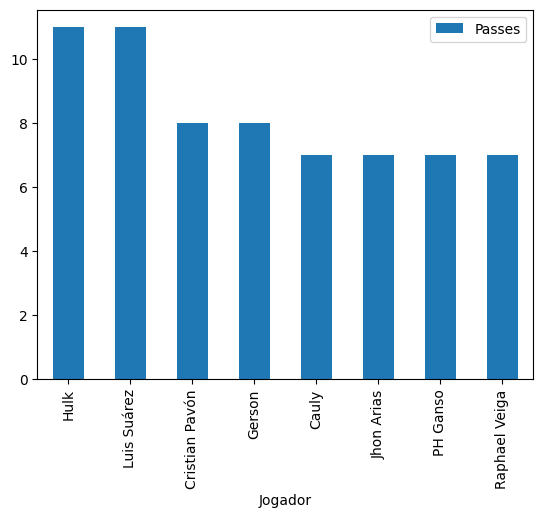

In [ ]:
# Gráfico das assistências
passes.plot.bar(x='Jogador', y='Passes')

**<h3> Uma informação interessante é que Hulk e Suarez foram os únicos com mais gols e passes nas duas tabelas. Craques! </h3>**

In [ ]:
Jogadores_com_passes_gols = pd.merge(artilheiro, passes, how='inner', on='Jogador')
Jogadores_com_passes_gols

,Jogador,Gols,Passes
0,Luis Suárez,17,11
1,Hulk,15,11


**<h2>Quantos times estiveram mais tempo na liderança ? </h2>**




In [ ]:
df = pd.read_html(str(table))[5]
tabela_lideres = pd.DataFrame(df)
tabela_lideres.head(10)

,Rodada ↓,AMM,ATP,ATM,BAH,BOT,COR,CTB,CRU,CUI,...,FLU,FOR,GOI,GRE,INT,PAL,RBB,SAN,SPA,VAS
0,1ª,20,3,15,12,4,6,19,13,16,...,1,10,18,9,10,7,4,17,13,8
1,2ª,20,11,16,18,2,14,19,12,15,...,1,3,10,13,6,4,7,17,9,5
2,3ª,20,16,10,14,1,17,19,6,18,...,5,2,15,7,4,3,12,11,8,9
3,4ª,20,10,16,9,1,15,19,3,13,...,6,4,18,7,8,2,12,14,5,11
4,5ª,20,4,8,13,1,16,19,4,17,...,3,6,18,10,11,2,15,9,7,14
5,6ª,20,5,6,14,1,17,19,4,18,...,3,8,15,11,12,2,13,7,10,16
6,7ª,19,7,4,13,1,18,20,5,14,...,3,11,16,10,15,2,12,9,8,17
7,8ª,19,11,4,16,1,14,20,6,15,...,8,9,17,5,13,2,10,12,3,18
8,9ª,18,7,3,15,1,16,20,10,14,...,6,9,17,4,13,2,11,12,8,19
9,10ª,18,7,4,15,1,16,20,9,14,...,5,11,17,6,10,2,12,13,8,19


In [ ]:
print(tabela_lideres.columns)

Index(['Rodada ↓', 'AMM', 'ATP', 'ATM', 'BAH', 'BOT', 'COR', 'CTB', 'CRU',
       'CUI', 'FLA', 'FLU', 'FOR', 'GOI', 'GRE', 'INT', 'PAL', 'RBB', 'SAN',
       'SPA', 'VAS'],
      dtype='object')


In [ ]:
tabela_lideres = tabela_lideres[["BOT","FLU","PAL"]]
LIDER = tabela_lideres[["BOT","FLU","PAL"]]== "1"
LIDER.sum()

BOT    31
FLU     2
PAL     5
dtype: int64

<Axes: >

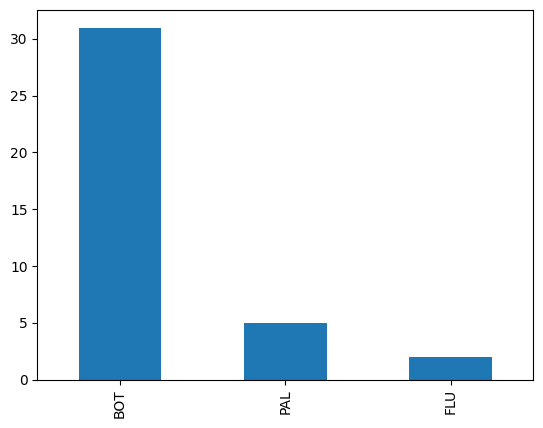

In [ ]:
GRAFICO = LIDER.sum().sort_values(ascending=False)
GRAFICO.plot(kind="bar")

In [ ]:
LANTERNA = tabela_lideres[["AMM","CTB","VAS"]]=="20"
LANTERNA.sum()

AMM    25
CTB    11
VAS     2
dtype: int64

<Axes: >

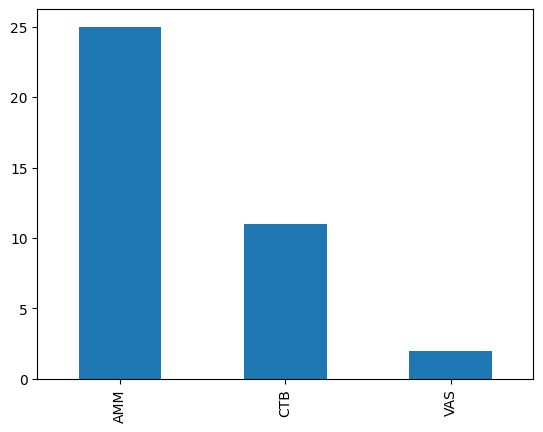

In [ ]:
GRAFICO_ = LANTERNA.sum()
GRAFICO.plot(kind="bar")

In [ ]:
# mask = (tabela_lideres[["BOT","FLU","PAL"]] == "1")

# # Apply the mask to the DataFrame
# LIDER = tabela_lideres[mask]
# LIDER